<a href="https://colab.research.google.com/github/SundayMba/project/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Grants Colab access to your Drive

Mounted at /content/drive


In [6]:
# !ls "/content/drive/MyDrive/"  # List all folders in Drive
!ls "/content/drive/MyDrive/Tool_Wear_Projects/Raw_Time_Series"  # Check files

Glass  Silicon


In [7]:
import os
if os.path.exists("/content/drive/MyDrive/Tool_Wear_Projects/Raw_Time_Series/Glass/New_Tool/AE/AE_Glass_New_Tool.csv"):
    print("✅ File found! Proceed.")
else:
    print("❌ Path incorrect. Check the path above.")

✅ File found! Proceed.


In [10]:
# =============================================
# 1. Load Data (Replace paths with your actual files)
# =============================================
def load_tool_data(material, condition):
    """Load AE and Force data for given material and condition."""
    base_path = f"/content/drive/MyDrive/Tool_Wear_Projects/Raw_Time_Series/{material}/{condition}/"

    # Load AE data
    ae_file = f"{base_path}AE/AE_{material}_{condition}.csv"
    ae_data = pd.read_csv(ae_file,
                           header=None,
                           skiprows=1,
                           usecols=[0, 1],
                           names=["Time", "Voltage"],
                           dtype=float)

    # Load Force data
    force_file = f"{base_path}Force/F_{material}_{condition}.csv"
    force_data = pd.read_csv(force_file,
                              header=None,
                              skiprows=1,
                              usecols=[0, 1, 2, 3],
                              names=["Time", "Force_Chan1", "Force_Chan2", "Force_Chan3"],
                              dtype=float)

    force_data = force_data.iloc[:len(ae_data)]

    return ae_data, force_data

In [11]:
# Load AE data for Glass (New, Slightly Worn, Bad)
ae_new_glass, force_new_glass = load_tool_data('Glass', 'New_Tool')
ae_slightly_glass, force_slightly_glass = load_tool_data('Glass', 'Slightly_Worn')
ae_severely_glass, force_severely_glass = load_tool_data('Glass', 'Severely_Worn')

# Load AE data for Silicon (New, Slightly Worn and Serverly Worn)
ae_new_silicon, force_new_silicon = load_tool_data('Silicon', 'New_Tool')
ae_slightly_silicon, force_slightly_silicon = load_tool_data('Silicon', 'Slightly_Worn')
ae_severely_silicon, force_severely_silicon = load_tool_data('Silicon', 'Severely_Worn')

In [12]:
def extract_ae_features(signal):
    """Extract time-domain features from AE signals."""
    return {
        'Mean': np.mean(signal),
        'RMS': np.sqrt(np.mean(signal**2)),
        'Std': np.std(signal),
        'Kurtosis': pd.Series(signal).kurtosis(),
        'Peak_to_Peak': np.max(signal) - np.min(signal),
        'Zero_Crossings': len(np.where(np.diff(np.sign(signal)))[0])
    }

# Process Glass AE signals
ae_features_glass = {
    'New': extract_ae_features(ae_new_glass['Voltage'].values),
    'Slightly_Worn': extract_ae_features(ae_slightly_glass['Voltage'].values),
    'Bad': extract_ae_features(ae_severely_glass['Voltage'].values)
}

# Process Silicon AE signals
ae_features_silicon = {
    'New': extract_ae_features(ae_new_silicon['Voltage'].values),
    'Slightly_Worn': extract_ae_features(ae_slightly_silicon['Voltage'].values),
    'Bad': extract_ae_features(ae_severely_silicon['Voltage'].values)
}

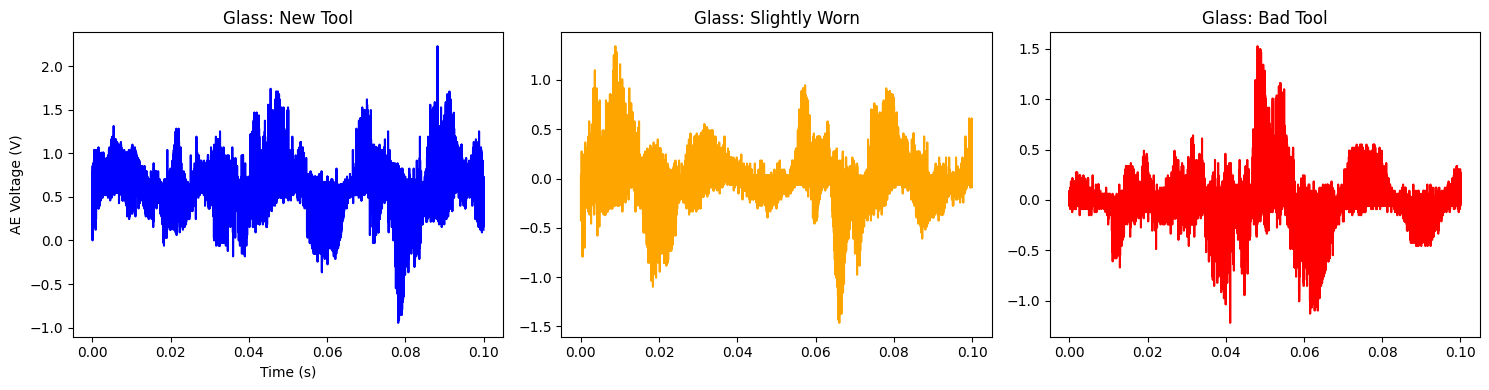

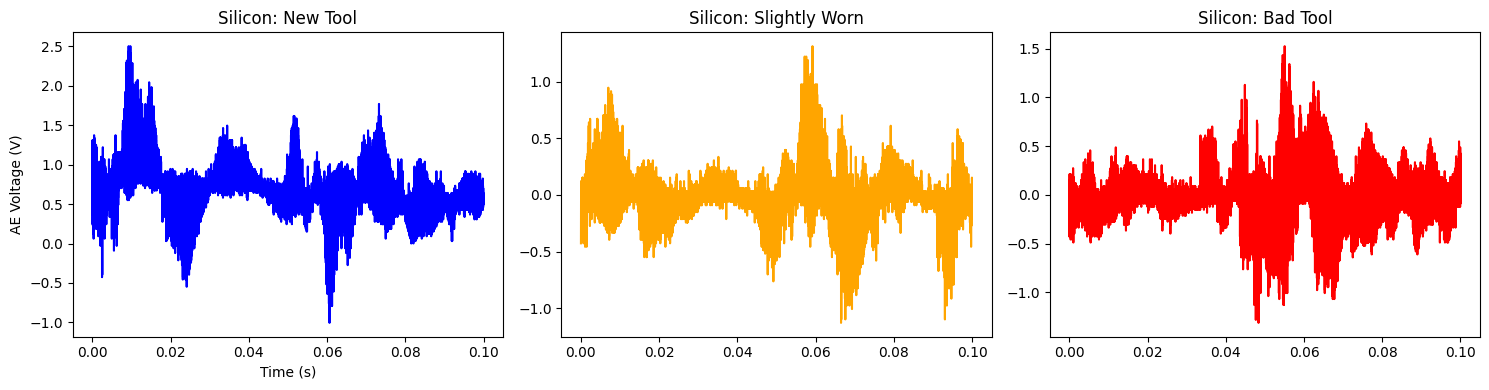

In [13]:
# Plot raw AE signals (Glass)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(ae_new_glass['Time'], ae_new_glass['Voltage'], label='New', color='blue')
plt.title('Glass: New Tool'), plt.xlabel('Time (s)'), plt.ylabel('AE Voltage (V)')

plt.subplot(1, 3, 2)
plt.plot(ae_slightly_glass['Time'], ae_slightly_glass['Voltage'], label='Slightly Worn', color='orange')
plt.title('Glass: Slightly Worn')

plt.subplot(1, 3, 3)
plt.plot(ae_severely_glass['Time'], ae_severely_glass['Voltage'], label='Bad', color='red')
plt.title('Glass: Bad Tool')
plt.tight_layout()
plt.show()

# Repeat for Silicon (replace data
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(ae_new_silicon['Time'], ae_new_silicon['Voltage'], label='New', color='blue')
plt.title('Silicon: New Tool'), plt.xlabel('Time (s)'), plt.ylabel('AE Voltage (V)')

plt.subplot(1, 3, 2)
plt.plot(ae_slightly_silicon['Time'], ae_slightly_silicon['Voltage'], label='Slightly Worn', color='orange')
plt.title('Silicon: Slightly Worn')

plt.subplot(1, 3, 3)
plt.plot(ae_severely_silicon['Time'], ae_severely_silicon['Voltage'], label='Bad', color='red')
plt.title('Silicon: Bad Tool')
plt.tight_layout()
plt.show()

In [14]:
# Convert to DataFrame for easy comparison
features_df = pd.DataFrame({
    'Glass_New': ae_features_glass['New'],
    'Glass_Worn': ae_features_glass['Slightly_Worn'],
    'Glass_Bad': ae_features_glass['Bad'],
    'Silicon_New': ae_features_silicon['New'],
    'Silicon_Worn': ae_features_silicon['Slightly_Worn'],
    'Silicon_Bad': ae_features_silicon['Bad']
}).T

features_df.to_csv('/content/drive/MyDrive/Tool_Wear_Projects/Outputs/AE_TimeDomain_Features.csv')
print(features_df)

                  Mean       RMS       Std   Kurtosis  Peak_to_Peak  \
Glass_New     0.608830  0.650330  0.228595   6.000147      3.173457   
Glass_Worn   -0.008108  0.214546  0.214393   6.986030      2.807290   
Glass_Bad    -0.010074  0.190807  0.190541  11.546433      2.746260   
Silicon_New   0.674887  0.726082  0.267812   6.102231      3.509120   
Silicon_Worn -0.012536  0.183834  0.183406   7.587381      2.441120   
Silicon_Bad  -0.013198  0.233522  0.233148   5.582514      2.837810   

              Zero_Crossings  
Glass_New              332.0  
Glass_Worn            4995.0  
Glass_Bad             4883.0  
Silicon_New            276.0  
Silicon_Worn          4576.0  
Silicon_Bad           4884.0  


In [15]:
def extract_force_features(chan1, chan2, chan3):
    """Extract features for all 3 force channels."""
    return {
        'Chan1_RMS': np.sqrt(np.mean(chan1**2)),
        'Chan2_RMS': np.sqrt(np.mean(chan2**2)),
        'Chan3_RMS': np.sqrt(np.mean(chan3**2)),
        'Resultant_RMS': np.sqrt(np.mean(chan1**2 + chan2**2 + chan3**2)),
        'Chan1_Kurtosis': pd.Series(chan1).kurtosis(),
        'Chan2_Kurtosis': pd.Series(chan2).kurtosis(),
        'Chan3_Kurtosis': pd.Series(chan3).kurtosis(),
        'Chan1_Peak_to_Peak': np.max(chan1) - np.min(chan1),
        'Chan2_Peak_to_Peak': np.max(chan2) - np.min(chan2),
        'Chan3_Peak_to_Peak': np.max(chan3) - np.min(chan3)
        # Add other features as needed
    }

# Process Glass Force signals
force_features_glass = {
    'New': extract_force_features(
        force_new_glass['Force_Chan1'],
        force_new_glass['Force_Chan2'],
        force_new_glass['Force_Chan3']
    ),
    'Slightly_Worn': extract_force_features(
        force_slightly_glass['Force_Chan1'],
        force_slightly_glass['Force_Chan2'],
        force_slightly_glass['Force_Chan3']
    ),
    'Severely_Worn': extract_force_features(
        force_severely_glass['Force_Chan1'],
        force_severely_glass['Force_Chan2'],
        force_severely_glass['Force_Chan3']
    )
}

# Force feature for Silicon
force_features_silicon = {
    'New': extract_force_features(
        force_new_silicon['Force_Chan1'],
        force_new_silicon['Force_Chan2'],
        force_new_silicon['Force_Chan3']
    ),
    'Slightly_Worn': extract_force_features(
        force_slightly_silicon['Force_Chan1'],
        force_slightly_silicon['Force_Chan2'],
        force_slightly_silicon['Force_Chan3']
    ),
    'Severely_Worn': extract_force_features(
        force_severely_silicon['Force_Chan1'],
        force_severely_silicon['Force_Chan2'],
        force_severely_silicon['Force_Chan3']
    )
}

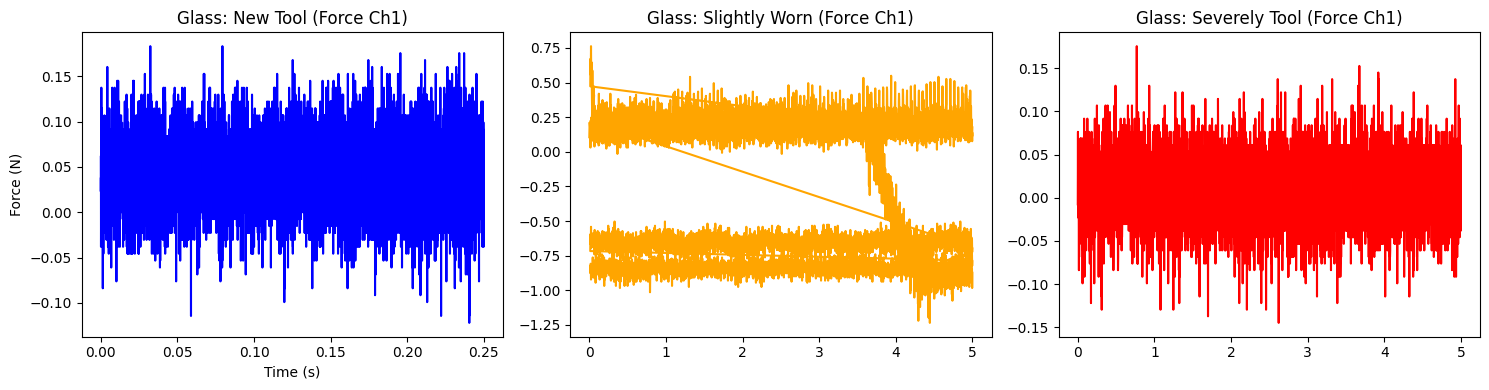

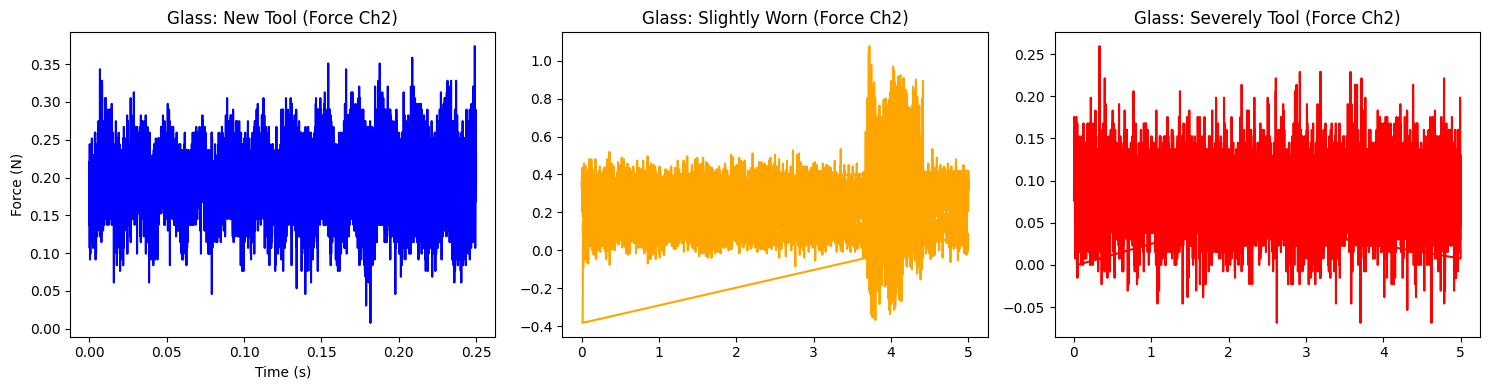

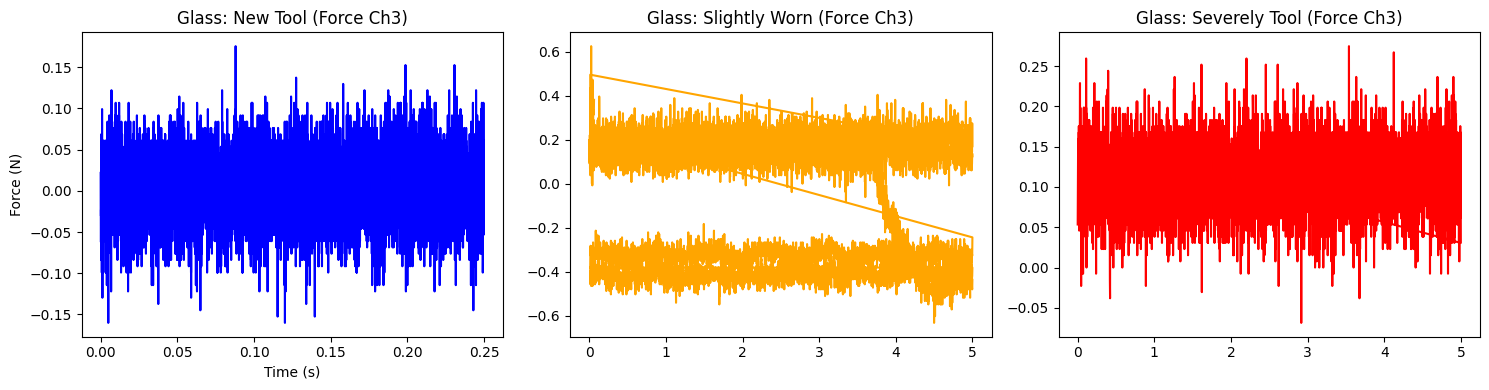

In [18]:
# Plot Force Channel 1 for Glass
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(force_new_glass['Time'], force_new_glass['Force_Chan1'], label='New', color='blue')
plt.title('Glass: New Tool (Force Ch1)'), plt.xlabel('Time (s)'), plt.ylabel('Force (N)')

plt.subplot(1, 3, 2)
plt.plot(force_slightly_glass['Time'], force_slightly_glass['Force_Chan1'], label='Slightly Worn', color='orange')
plt.title('Glass: Slightly Worn (Force Ch1)')

plt.subplot(1, 3, 3)
plt.plot(force_severely_glass['Time'], force_severely_glass['Force_Chan1'], label='Severely', color='red')
plt.title('Glass: Severely Tool (Force Ch1)')
plt.tight_layout()
plt.show()

# Plot Force Channel 2 for Glass
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(force_new_glass['Time'], force_new_glass['Force_Chan2'], label='New', color='blue')
plt.title('Glass: New Tool (Force Ch2)'), plt.xlabel('Time (s)'), plt.ylabel('Force (N)')

plt.subplot(1, 3, 2)
plt.plot(force_slightly_glass['Time'], force_slightly_glass['Force_Chan2'], label='Slightly Worn', color='orange')
plt.title('Glass: Slightly Worn (Force Ch2)')

plt.subplot(1, 3, 3)
plt.plot(force_severely_glass['Time'], force_severely_glass['Force_Chan2'], label='Severely', color='red')
plt.title('Glass: Severely Tool (Force Ch2)')
plt.tight_layout()
plt.show()


# Plot Force Channel 3 for Glass
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(force_new_glass['Time'], force_new_glass['Force_Chan3'], label='New', color='blue')
plt.title('Glass: New Tool (Force Ch3)'), plt.xlabel('Time (s)'), plt.ylabel('Force (N)')

plt.subplot(1, 3, 2)
plt.plot(force_slightly_glass['Time'], force_slightly_glass['Force_Chan3'], label='Slightly Worn', color='orange')
plt.title('Glass: Slightly Worn (Force Ch3)')

plt.subplot(1, 3, 3)
plt.plot(force_severely_glass['Time'], force_severely_glass['Force_Chan3'], label='Severely', color='red')
plt.title('Glass: Severely Tool (Force Ch3)')
plt.tight_layout()
plt.show()

In [ ]:
force_features_df = pd.DataFrame({
    'Glass_New': force_features_glass['New'],
    'Glass_Slightly_Worn': force_features_glass['Slightly_Worn'],
    'Glass_Severely_Worn': force_features_glass['Severely_Worn'],
    'Silicon_New': force_features_silicon['New'],
    'Silicon_Slightly_Worn': force_features_silicon['Slightly_Worn'],
    'Silicon_Severely_Worn': force_features_silicon['Severely_Worn']
}).T

print(force_features_df)

In [ ]:
force_features_df.to_csv('/content/drive/MyDrive/Tool_Wear_Projects/Outputs/Force_TimeDomain_Features.csv')

# New Section